### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import io
from scipy import stats
import pickle

### User Options

In [2]:
# load_folder='' #Folder where results are (for loading them)
load_folder='/home/jglaser/Files/Neural_Decoding/Results/'
# fig_folder='' #Folder to save the figures to
fig_folder='/home/jglaser/Figs/Decoding/' 
datasets=['m1','s1','hc'] #Names of the datasets
num_nrns_used=10 #Number of neurons used for decoding
ill=1 #Whether I am making these plots for exporting to adobe illustrator (in which case I remove the text)
colors=['purple','cyan','gold', 'red'] #Colors to plot each method

### Plot Summary (Fig. 7)

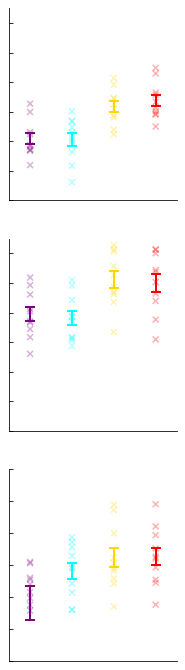

In [3]:
d=0 #Initialize index of the dataset I'm looking at (this will be the row I plot in the figure)
fig, ax = plt.subplots(3,1,figsize=(3,12)) #Create figure (3 rows by 1 column)

for dataset in datasets: #Loop through datasets
    
    ####LOAD RESULTS FOR ALL METHODS####

    with open(load_folder+dataset+'_results_nrn'+str(num_nrns_used)+'_wf.pickle','rb') as f:
            [mean_r2_wf,y_pred_wf_all,y_train_pred_wf_all,y_valid_pred_wf_all]=pickle.load(f)
        
    with open(load_folder+dataset+'_results_nrn'+str(num_nrns_used)+'_dnn.pickle','rb') as f:
        [mean_r2_dnn,y_pred_dnn_all,y_train_pred_dnn_all,y_valid_pred_dnn_all,time_elapsed]=pickle.load(f)    

    with open(load_folder+dataset+'_results_nrn'+str(num_nrns_used)+'_lstm.pickle','rb') as f:
        [mean_r2_lstm,y_pred_lstm_all,y_train_pred_lstm_all,y_valid_pred_lstm_all,time_elapsed]=pickle.load(f)

    with open(load_folder+dataset+'_results_nrn'+str(num_nrns_used)+'_kf.pickle','rb') as f:
        [mean_r2_kf,y_pred_kf_all,y_valid_pred_kf_all,y_train_pred_kf_all,y_kf_test_all,y_kf_valid_all,y_kf_train_all]=pickle.load(f)            
            
    #### Calculate the mean and standard error across cross-validation folds ####
    
    n=mean_r2_wf.shape[0] #Number of folds
    means=([np.mean(mean_r2_wf), np.mean(mean_r2_kf),np.mean(mean_r2_dnn),np.mean(mean_r2_lstm)])
    err=([np.std(mean_r2_wf)/np.sqrt(n),np.std(mean_r2_kf)/np.sqrt(n),np.std(mean_r2_dnn)/np.sqrt(n),np.std(mean_r2_lstm)/np.sqrt(n)])
   
    #####PLOT RESULTS######

    #Plot bars
    ind = np.arange(len(err)) #X values for plotting
    for pos, y, yerr, color in zip(ind, means, err, colors): #Loop through methods and plot error bars
        ax[d].errorbar(pos, y, yerr, lw=2, capsize=5, capthick=2, color=color)
    #Remove x tick labels
    labels = [item.get_text() for item in ax[d].get_xticklabels()]
    empty_string_labels = ['']*len(labels)
    ax[d].set_xticklabels(empty_string_labels)

    #Remove right and top boundaries, and make ticks inward
    ax[d].tick_params(direction='in',bottom=0)
    ax[d].spines['right'].set_color('none')
    ax[d].spines['top'].set_color('none')

    #Plot individual R2 values for each fold as an 'x'
    scatter_x=np.reshape(np.transpose(np.ones((10,1))*range(4)),(40,1)) #Get x values for plotting (first 10 will have an x value of 0, second 10 will have an x value of 1, etc)
    scatter_y=np.concatenate((mean_r2_wf,mean_r2_kf,mean_r2_dnn,mean_r2_lstm),axis=0) #Y values for plotting
    colors_list=[] #Create a list of the colors that should be used when plotting each 'x'
    for i in scatter_x.astype(np.int).reshape((1,-1))[0]:
        colors_list.append(colors[i])
    ax[d].scatter(scatter_x,scatter_y,c=colors_list,marker='x',alpha=0.3)

    #Set y axis limits and ticks
    if dataset=='hc':
        ax[d].set_ylim([-0.1, .5])
    else:
        ax[d].set_ylim([0, .65])
    ax[d].set_xlim([-0.5, 3.5])
    if ill:
        ax[d].set_yticklabels('')
    
    d=d+1 #Increase dataset index (so the next dataset gets plot on the next row)
    
plt.show()

fig.savefig(fig_folder+'few_neurons_summary_v3.eps') #Save figure